In [1]:
import os
import sys
# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.utils import Dataset
from mrcnn import visualize
import pandas as pd

/home/bartosz/.pyenv/versions/3.7.4/envs/open-images/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bartosz/.pyenv/versions/3.7.4/envs/open-images/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bartosz/.pyenv/versions/3.7.4/envs/open-images/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int1

In [2]:
import numpy as np

In [3]:
import skimage

In [4]:
from openimages import OpenImageDataset

In [12]:
PATH = os.path.abspath(os.path.join(ROOT_DIR, '../data/'))
dataset = OpenImageDataset()
dataset.load_dataset(PATH, 'validation')

In [13]:
dataset.prepare()

In [14]:
dataset.image_ids

array([    0,     1,     2, ..., 12962, 12963, 12964])

In [15]:
%matplotlib inline

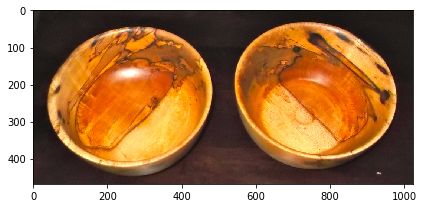

In [16]:
skimage.io.imshow(dataset.load_image(5))

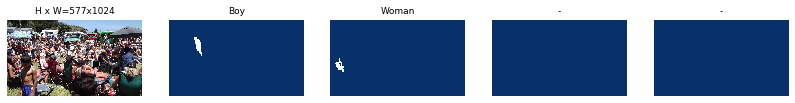

(577, 1024, 3) (577, 1024, 2)


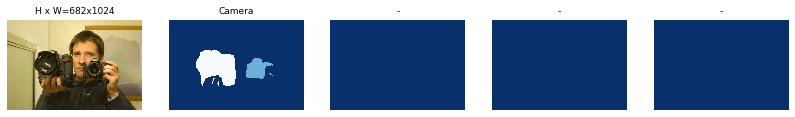

(682, 1024, 3) (682, 1024, 2)


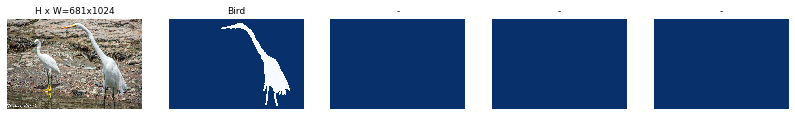

(681, 1024, 3) (681, 1024, 1)


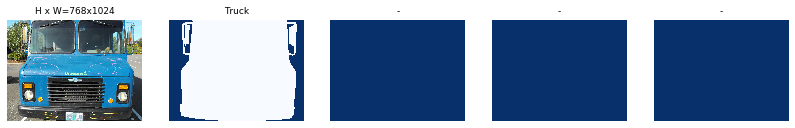

(768, 1024, 3) (768, 1024, 1)


In [17]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)
    print(image.shape, mask.shape)

In [18]:
dataset.image_info[image_id]['id']

'e865fb50fafbb374'

array([112029, 518553,  12965, 378809])

In [13]:
len(list(dataset._annotations.keys()))

944039

In [ ]:
skimage.io.imshow(dataset.load_mask(image_ids[1])[0][:, :, 2])

In [ ]:
dataset._annotations['00090f2ef9818205']

In [ ]:
import random
from mrcnn import utils
# Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
#image = utils.resize(image, mask.shape[:2], preserve_range=True)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id), image.shape, mask.shape)

# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

In [ ]:
1600/1066.

In [ ]:
from mrcnn.config import Config

In [ ]:

class OpenImageConfig(Config):
    IMAGE_MIN_DIM = 1024
    IMAGE_MAX_DIM = 1024
    
config = OpenImageConfig()

# Load random image and mask.
image_id = np.random.choice(dataset.image_ids, 1)[0]
image = dataset.load_image(image_id)
orig_image_width = max(image.shape[:2])
mask, class_ids = dataset.load_mask(image_id)
orig_mask_width = max(mask.shape[:2])
original_shape = image.shape
# Resize
image, window, scale, padding, _ = utils.resize_image(
    image, 
    min_dim=config.IMAGE_MIN_DIM, 
    max_dim=config.IMAGE_MAX_DIM,
    mode=config.IMAGE_RESIZE_MODE)

mask = utils.resize_mask(mask, scale, padding)
print(image.shape)
print(mask.shape)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id: ", image_id, dataset.image_reference(image_id))
print("Original shape: ", original_shape)

# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

In [17]:
len(dataset.class_names)

602